In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas.api.types import is_numeric_dtype
import seaborn as sns


In [2]:
df2 =pd.read_csv('vgsales.csv')
df5=pd.read_csv('tips.csv')
dfs=pd.read_csv('surveys.csv')

In [3]:
#Is the function that will show number of observations
#number of entries, number of unique entries, number of missing entries, number of outliers,
#number of extreme values ,mode, or modes,mean,standard deviation
#max,min, Q3, Q2 (median), Q1, skewness,and the kurtosis

def quantDDA(df):
    pandas_stats_df=df.describe().T
    Q1=df.describe().loc['25%']
    Q3=df.describe().loc['75%']
    IQR=Q3-Q1
    IQR_df=pd.DataFrame(IQR)
    IQR_df.columns=['IQR']
    output_df=pd.concat([pandas_stats_df,IQR_df],axis=1)
    lower_value= Q1-(1.5*IQR)
    lower_value
    upper_value= Q3+(1.5*IQR)
    upper_value
    outliers =pd.DataFrame(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())
    outliers.columns=['Count_Outliers']
    extremes_df =pd.DataFrame(((df < (Q1 - 3.0 * IQR)) | (df > (Q3 + 3.0 * IQR))).sum())
    extremes_df.columns=['Count_Of_Extremes']
    
    list_of_columns=list(df.columns)
    stats_dict={}
    for x in list_of_columns: 
        if(is_numeric_dtype(df[x])):
            #stats.describe(df[x])
            skewness=stats.describe(df[x]).skewness
            variance=stats.describe(df[x]).variance
            kurtosis=stats.describe(df[x]).kurtosis
            number_of_obs=stats.describe(df[x]).nobs
            stats_dict[x]={'Nobs':number_of_obs, 'skewness':skewness, 'variance':variance, 'kurtosis':kurtosis}


    new_df=pd.DataFrame(df.nunique())
    new_df.columns=['Unique_Values']
    null_df=pd.DataFrame(df.isnull().sum())
    null_df.columns=['Null_Values']
    
    stats_df=pd.DataFrame(stats_dict).T
    mode_df=df.mode(axis=0,numeric_only=True).dropna().T
    mode_df.columns=['Mode']
    outputdf=pd.concat([output_df,outliers,extremes_df,stats_df,mode_df,new_df,null_df],axis=1)
    
    
  

    return outputdf

In [11]:
#Quantitative Descriptions for Video Games 
quantDDA(df2)

,count,mean,std,min,25%,50%,75%,max,IQR,Count_Outliers,Count_Of_Extremes,Nobs,skewness,variance,kurtosis,Mode,Unique_Values,Null_Values
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00,8298.50,0,0,16598.0,0.000066,2.296186e+07,-1.199865,1.00,16598,0
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00,7.00,305,55,16598.0,NaN,NaN,NaN,2009.00,39,271
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49,0.24,1681,944,16598.0,18.797928,6.669712e-01,648.934378,0.00,409,0
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02,0.11,2081,1278,16598.0,18.873829,2.553799e-01,755.799707,0.00,305,0
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22,0.04,2425,1736,16598.0,11.205446,9.566070e-02,194.175126,0.00,244,0
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57,0.04,1665,1038,16598.0,24.231732,3.556559e-02,1025.038932,0.00,157,0
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74,0.41,1893,1048,16598.0,17.399073,2.418112e+00,603.750071,0.02,623,0
Genre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,12,0
Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,11493,0
Platform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,31,0


In [4]:

#using seabornes pair plot function to create the graph for vizDDA
def vizDDA(df):
    return sns.pairplot(df)
    
    

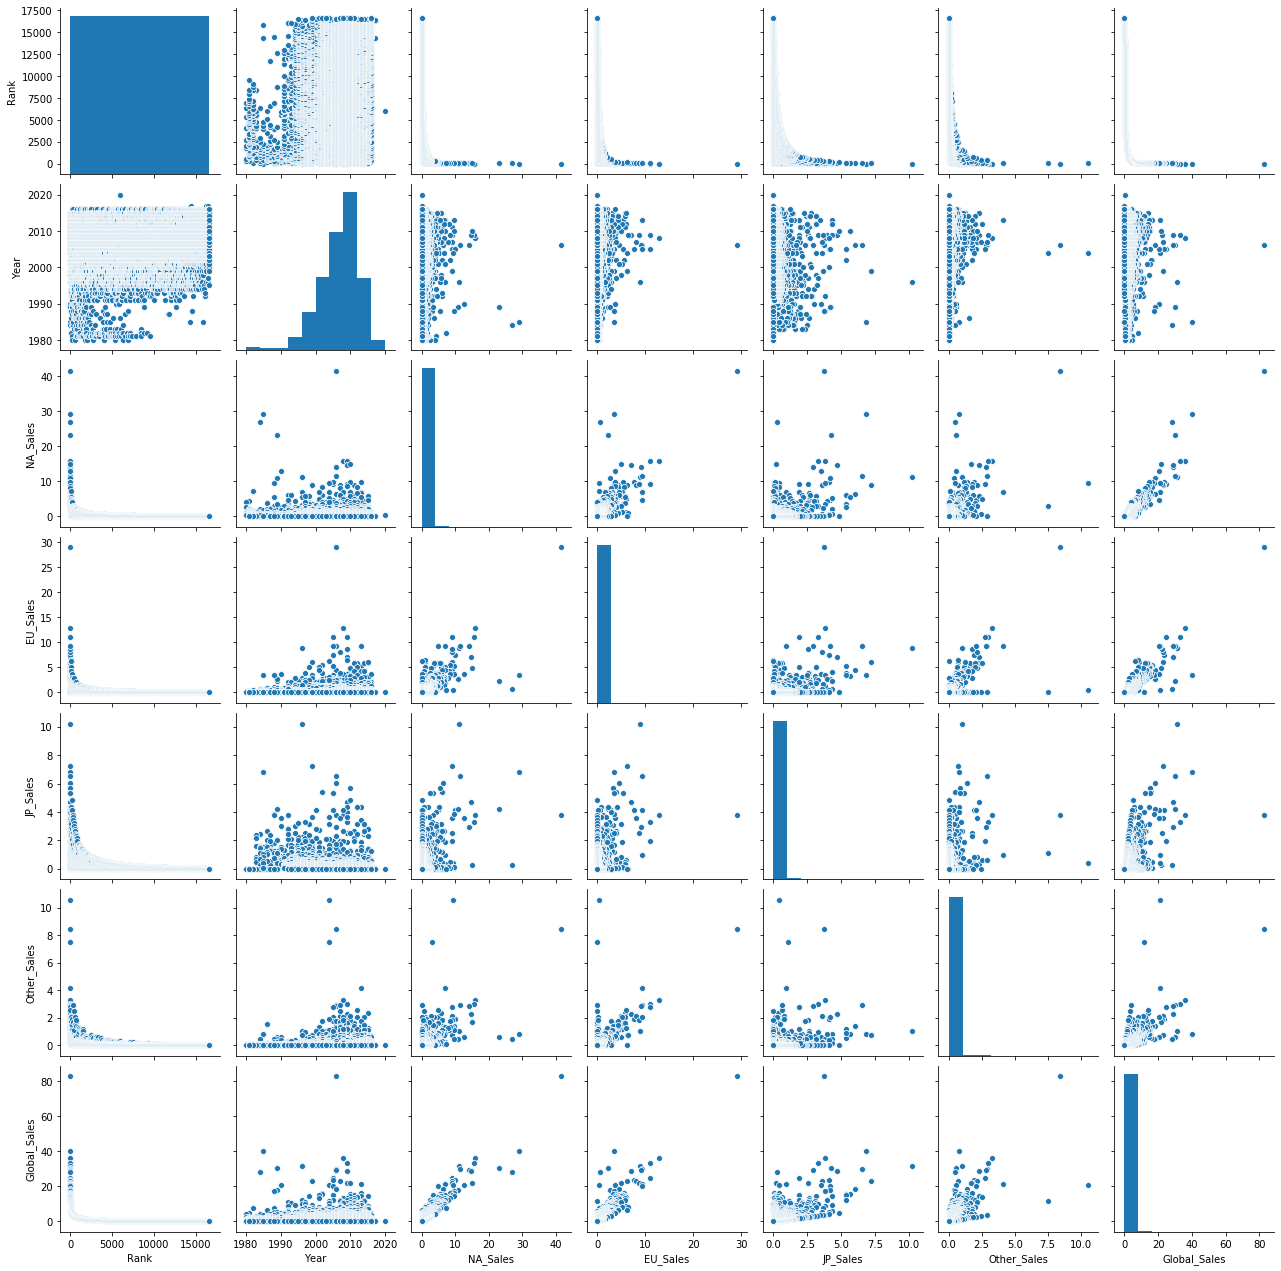

In [10]:
#Visual Descriptions for Video Games Sales
vizDDA(df2)

In [5]:
def add_missingValueCount(df):
    MissingValueCount_df=pd.DataFrame(df.isnull().sum(axis=1))
    MissingValueCount_df.columns=['MissingValueCount']
    revised_df=pd.concat([df,MissingValueCount_df],axis=1)
    return revised_df

In [6]:
df3=add_missingValueCount(df2)

,count,mean,std,min,25%,50%,75%,max,IQR,Count_Outliers,Count_Of_Extremes,Nobs,skewness,variance,kurtosis,Mode,Unique_Values,Null_Values
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00,8298.50,0,0,16598.0,0.000066,2.296186e+07,-1.199865,1.00,16598,0
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00,7.00,305,55,16598.0,NaN,NaN,NaN,2009.00,39,271
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49,0.24,1681,944,16598.0,18.797928,6.669712e-01,648.934378,0.00,409,0
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02,0.11,2081,1278,16598.0,18.873829,2.553799e-01,755.799707,0.00,305,0
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22,0.04,2425,1736,16598.0,11.205446,9.566070e-02,194.175126,0.00,244,0
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57,0.04,1665,1038,16598.0,24.231732,3.556559e-02,1025.038932,0.00,157,0
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74,0.41,1893,1048,16598.0,17.399073,2.418112e+00,603.750071,0.02,623,0
MissingValueCount,16598.0,0.019822,0.148597,0.00,0.00,0.00,0.00,2.00,0.00,307,307,16598.0,8.062999,2.208102e-02,71.312922,0.00,3,0
Genre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,12,0
Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,11493,0


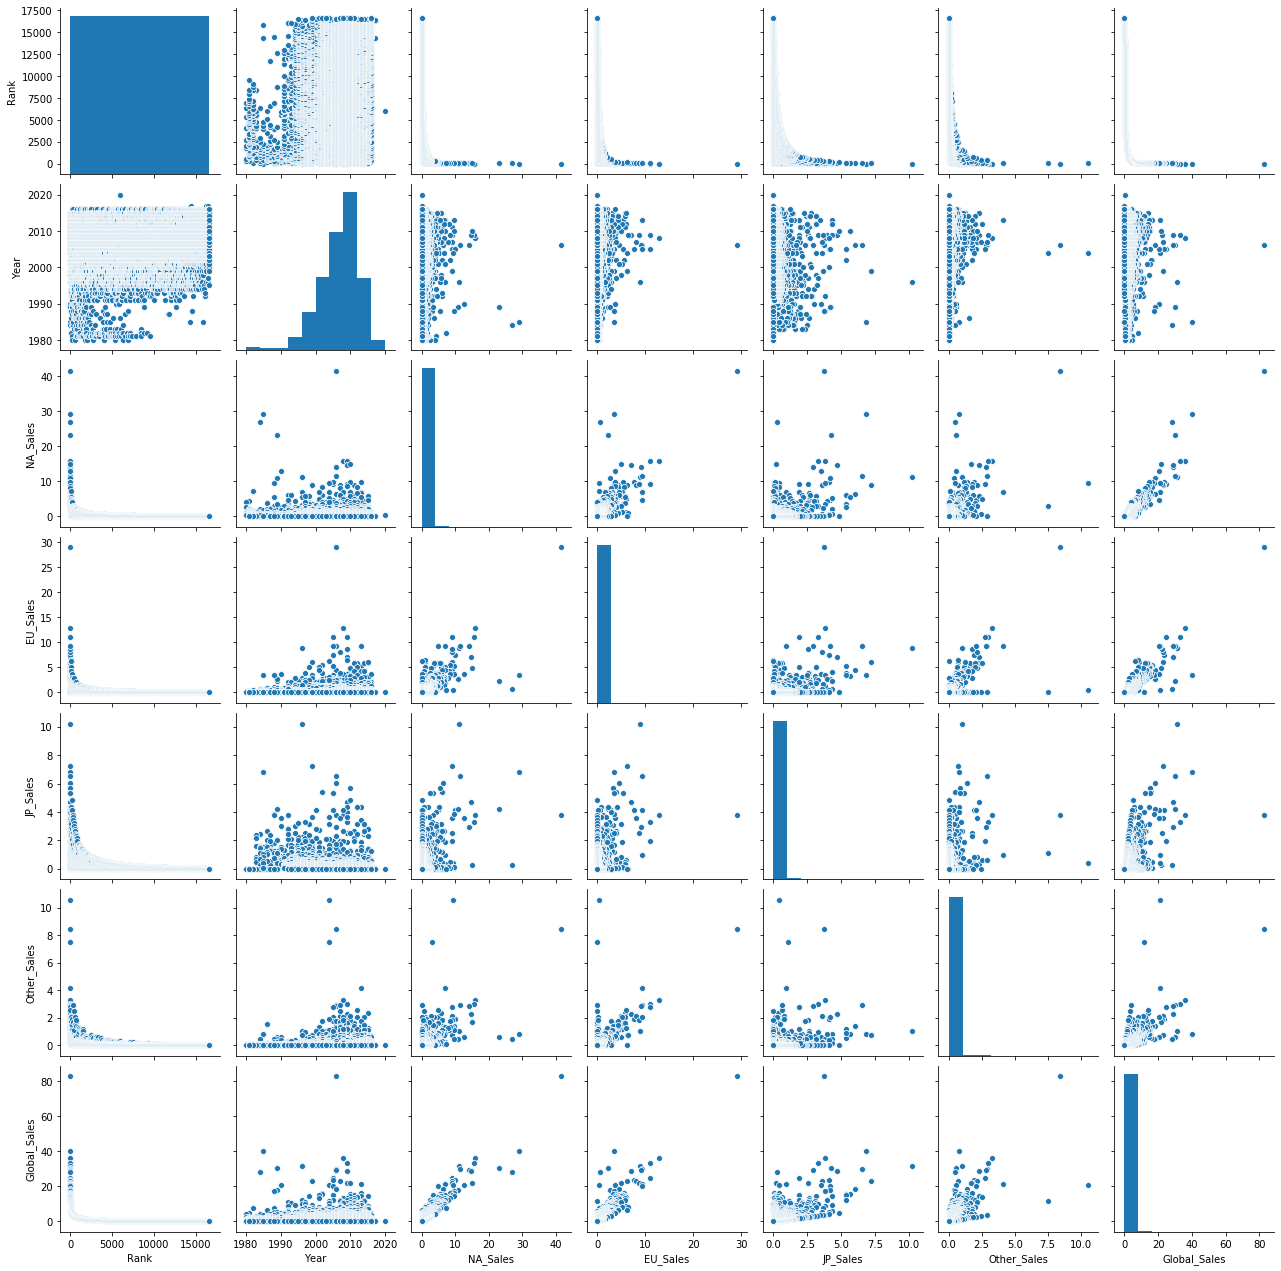

In [7]:
#running Quantitative Descriptions with Missing Values per Observation.
quantDDA(df3)


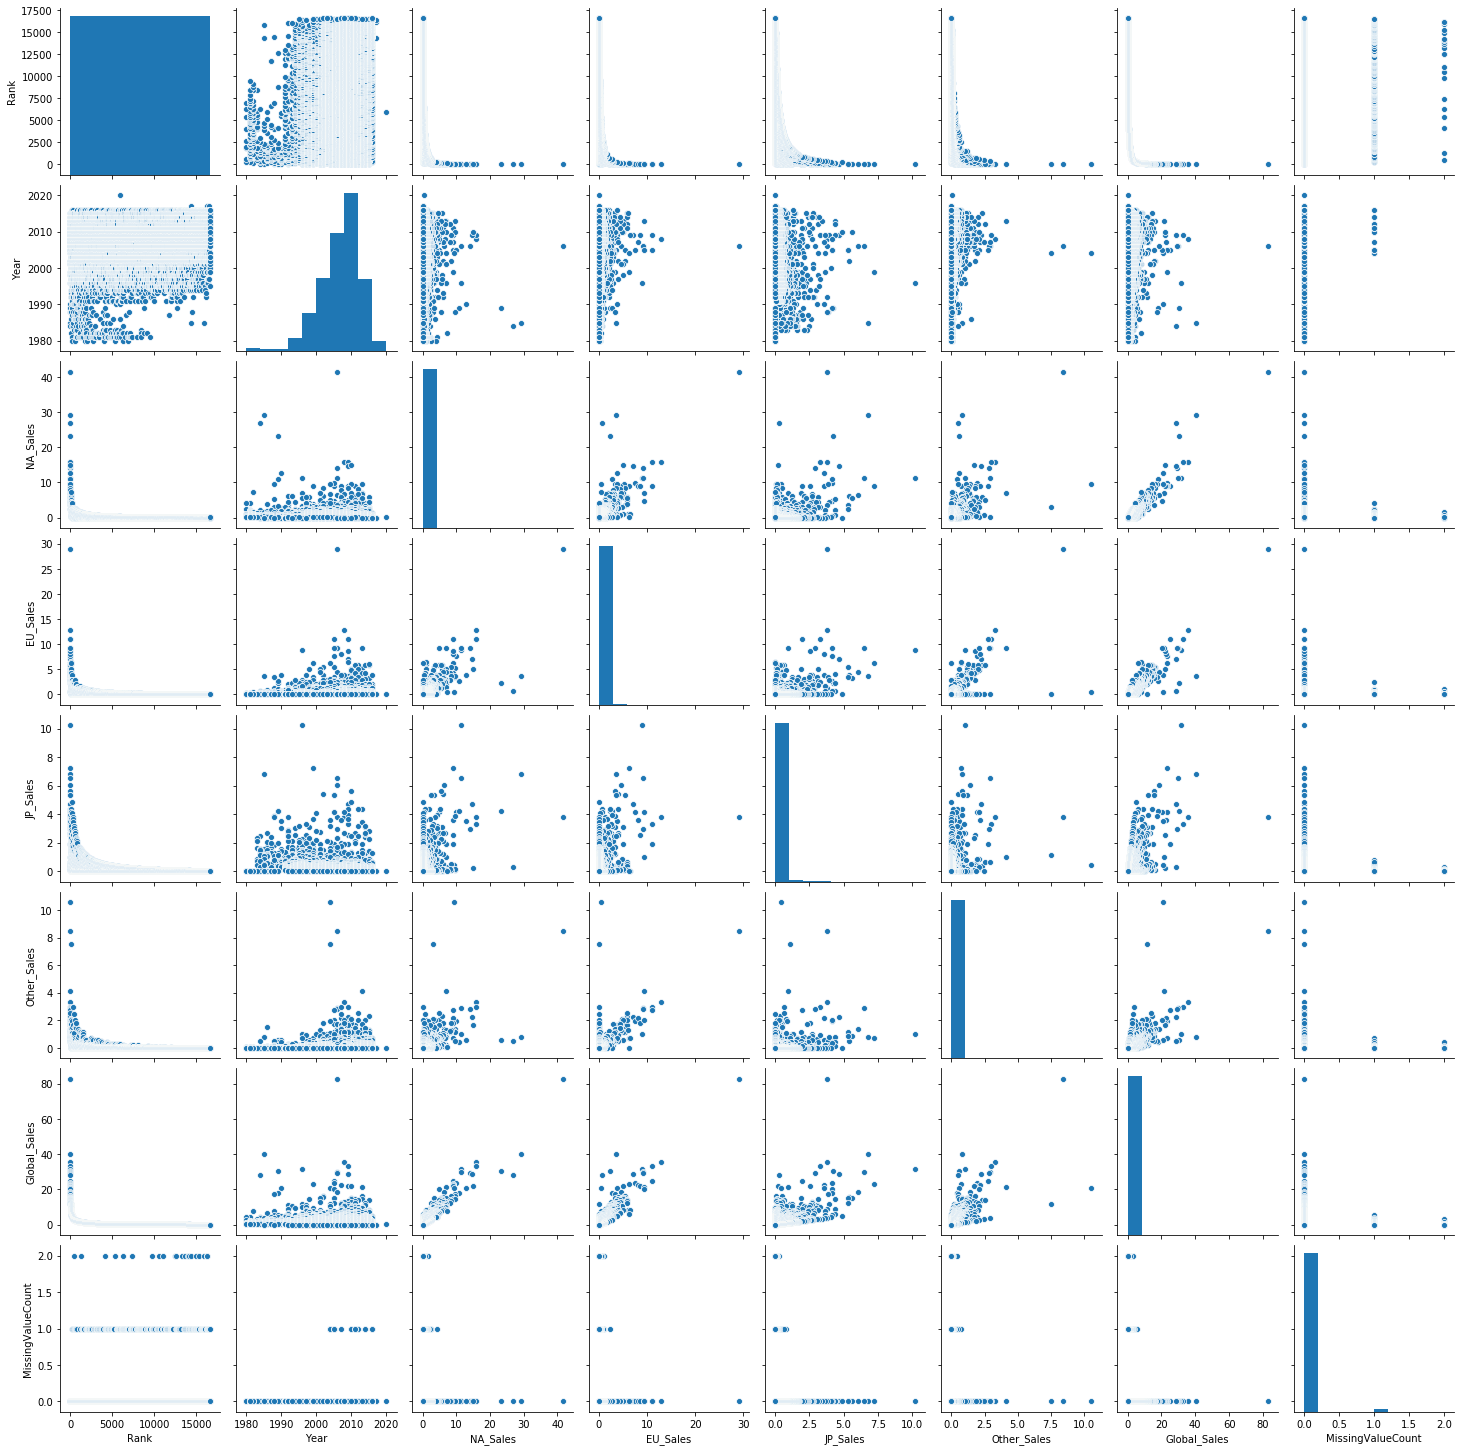

In [9]:
#this is Visual Descriptions with Missing Values per Observation
vizDDA(df3)

In [14]:

#The Following will show Quantitative Descriptions ,Visual Descriptions and Missing Values per Observation for tips.csv

quantDDA(df5)

,count,mean,std,min,25%,50%,75%,max,IQR,Count_Outliers,Count_Of_Extremes,Nobs,skewness,variance,kurtosis,Mode,Unique_Values,Null_Values
Unnamed: 0,244.0,122.500000,70.580923,1.00,61.7500,122.500,183.2500,244.00,121.5000,0,0,244.0,0.000000,4981.666667,-1.200040,1.00,244,0
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81,10.7800,9,0,244.0,1.126235,79.252939,1.169168,13.42,229,0
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00,1.5625,9,2,244.0,1.456427,1.914455,3.549552,2.00,123,0
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00,1.0000,9,0,244.0,1.438965,0.904591,1.671928,2.00,6,0
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,4,0
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,2,0
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,2,0
time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,2,0


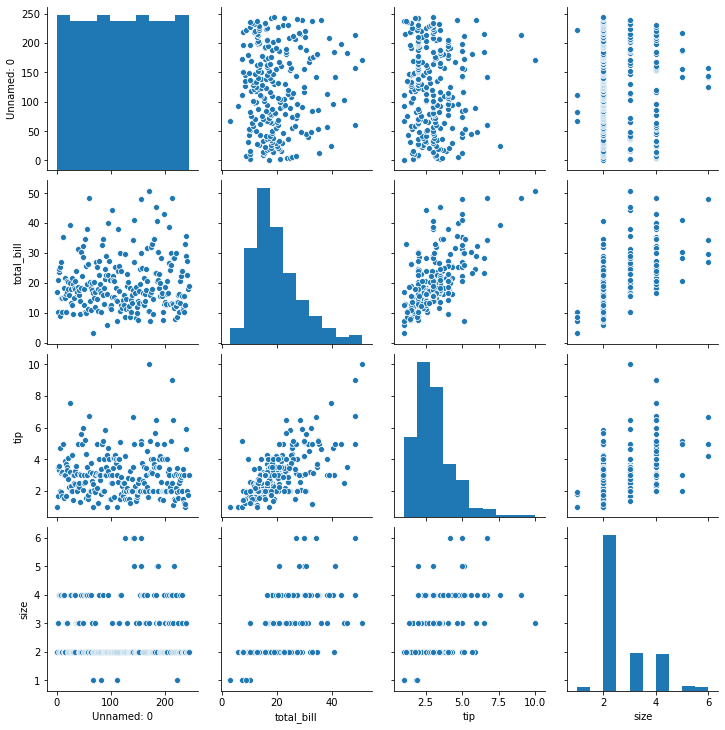

In [15]:
vizDDA(df5)

In [16]:
d6=add_missingValueCount(df5)

In [17]:
quantDDA(d6)

,count,mean,std,min,25%,50%,75%,max,IQR,Count_Outliers,Count_Of_Extremes,Nobs,skewness,variance,kurtosis,Mode,Unique_Values,Null_Values
Unnamed: 0,244.0,122.500000,70.580923,1.00,61.7500,122.500,183.2500,244.00,121.5000,0,0,244.0,0.000000,4981.666667,-1.200040,1.00,244,0
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81,10.7800,9,0,244.0,1.126235,79.252939,1.169168,13.42,229,0
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00,1.5625,9,2,244.0,1.456427,1.914455,3.549552,2.00,123,0
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00,1.0000,9,0,244.0,1.438965,0.904591,1.671928,2.00,6,0
MissingValueCount,244.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00,0.0000,0,0,244.0,0.000000,0.000000,-3.000000,0.00,1,0
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,4,0
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,2,0
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,2,0
time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,2,0


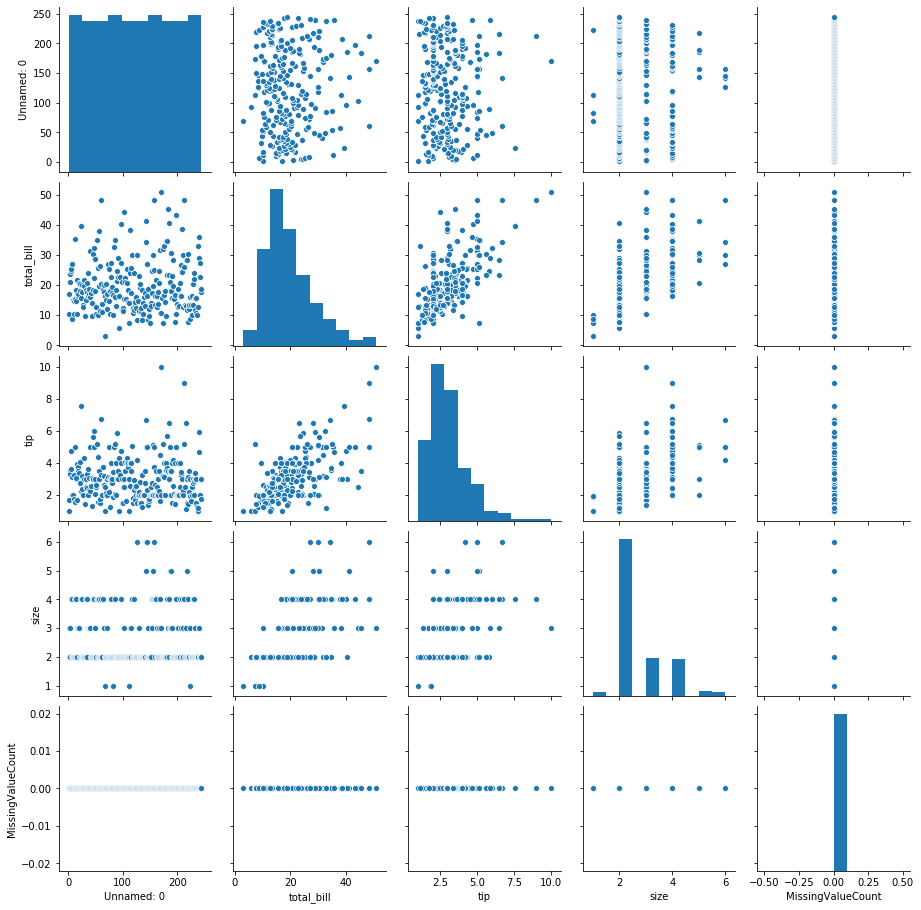

In [18]:
vizDDA(d6)

In [ ]:
#The Following will show Quantitative Descriptions ,Visual Descriptions and Missing Values per Observation for .csv

In [19]:
quantDDA(dfs)

,count,mean,std,min,25%,50%,75%,max,IQR,Count_Outliers,Count_Of_Extremes,Nobs,skewness,variance,kurtosis,Mode,Unique_Values,Null_Values
record_id,35549.0,17775.000000,10262.256696,1.0,8888.0,17775.0,26662.0,35549.0,17774.0,0,0,35549.0,0.000000,1.053139e+08,-1.200000,1.0,35549,0
month,35549.0,6.477847,3.396925,1.0,4.0,6.0,10.0,12.0,6.0,0,0,35549.0,0.049956,1.153910e+01,-1.204901,7.0,12,0
day,35549.0,15.991195,8.257366,1.0,9.0,16.0,23.0,31.0,14.0,0,0,35549.0,0.013880,6.818410e+01,-1.062854,16.0,31,0
year,35549.0,1990.475231,7.493355,1977.0,1984.0,1990.0,1997.0,2002.0,13.0,0,0,35549.0,-0.044144,5.615037e+01,-1.284761,1997.0,26,0
plot_id,35549.0,11.397001,6.799406,1.0,5.0,11.0,17.0,24.0,12.0,0,0,35549.0,0.121428,4.623192e+01,-1.147831,12.0,24,0
hindfoot_length,31438.0,29.287932,9.564759,2.0,21.0,32.0,36.0,70.0,15.0,2,0,35549.0,NaN,NaN,NaN,36.0,56,4111
weight,32283.0,42.672428,36.631259,4.0,20.0,37.0,48.0,280.0,28.0,3178,1567,35549.0,NaN,NaN,NaN,46.0,255,3266
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,2,2511
species_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,48,763


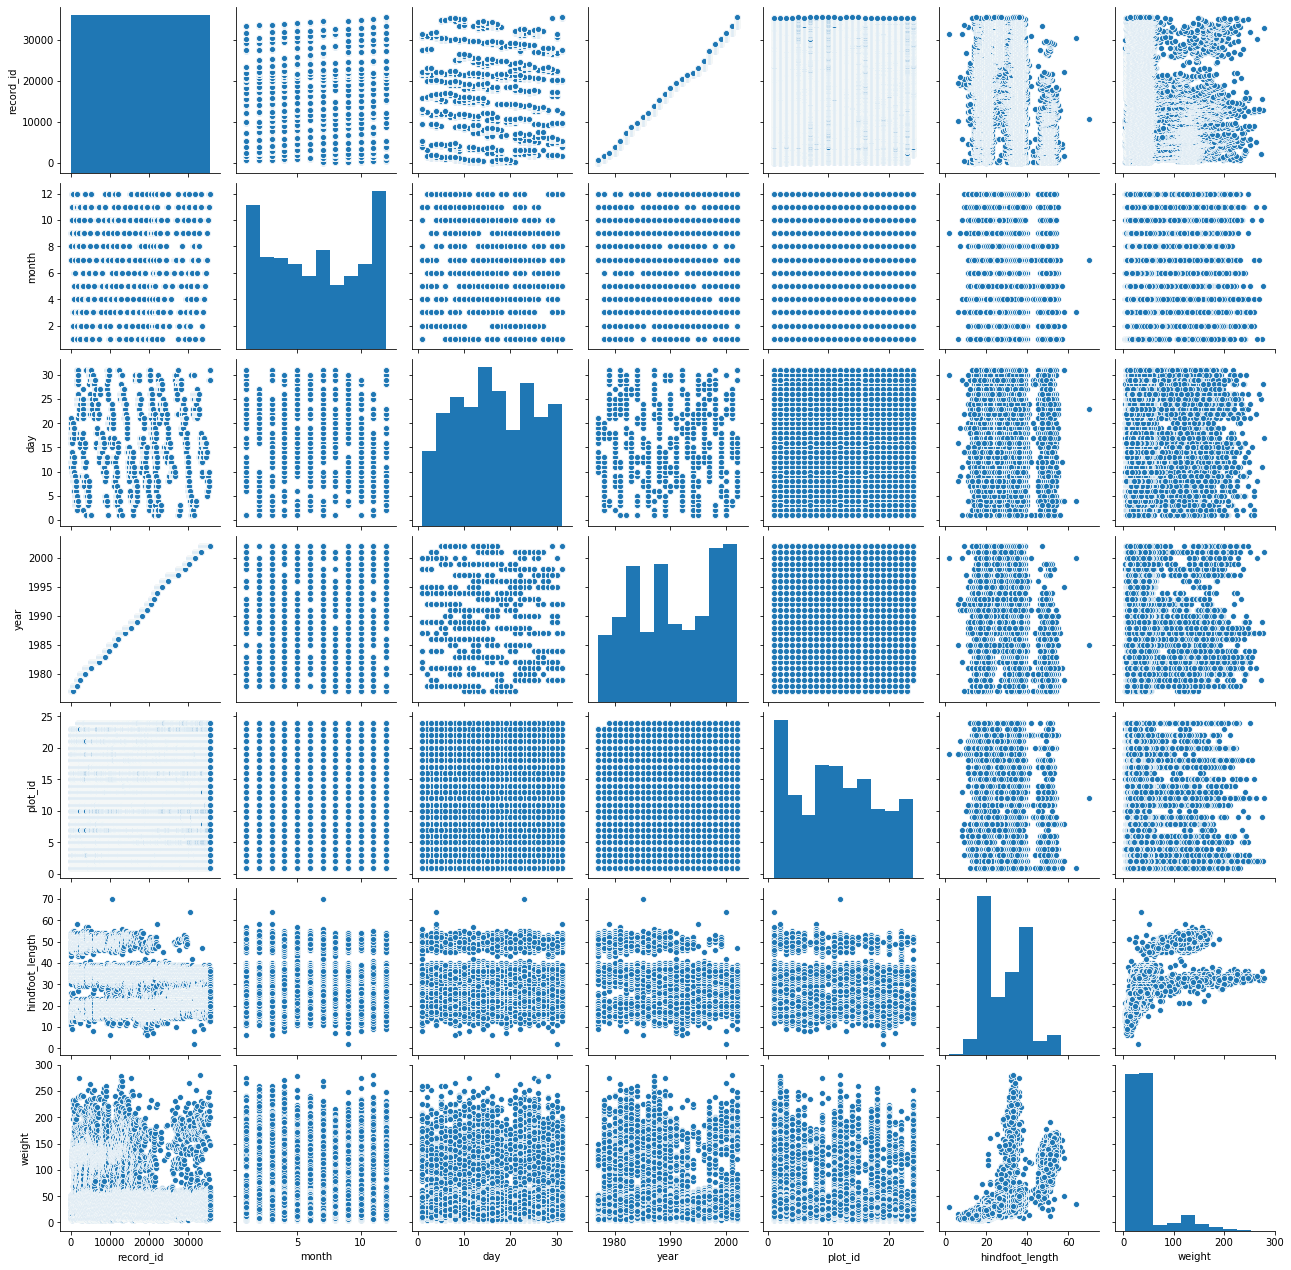

In [20]:
vizDDA(dfs)

In [21]:
dfsm=add_missingValueCount(dfs) #adding missing values column to oriogional dataframe and running quantDDA and vizDDA

In [23]:
quantDDA(dfsm)

,count,mean,std,min,25%,50%,75%,max,IQR,Count_Outliers,Count_Of_Extremes,Nobs,skewness,variance,kurtosis,Mode,Unique_Values,Null_Values
record_id,35549.0,17775.000000,10262.256696,1.0,8888.0,17775.0,26662.0,35549.0,17774.0,0,0,35549.0,0.000000,1.053139e+08,-1.200000,1.0,35549,0
month,35549.0,6.477847,3.396925,1.0,4.0,6.0,10.0,12.0,6.0,0,0,35549.0,0.049956,1.153910e+01,-1.204901,7.0,12,0
day,35549.0,15.991195,8.257366,1.0,9.0,16.0,23.0,31.0,14.0,0,0,35549.0,0.013880,6.818410e+01,-1.062854,16.0,31,0
year,35549.0,1990.475231,7.493355,1977.0,1984.0,1990.0,1997.0,2002.0,13.0,0,0,35549.0,-0.044144,5.615037e+01,-1.284761,1997.0,26,0
plot_id,35549.0,11.397001,6.799406,1.0,5.0,11.0,17.0,24.0,12.0,0,0,35549.0,0.121428,4.623192e+01,-1.147831,12.0,24,0
hindfoot_length,31438.0,29.287932,9.564759,2.0,21.0,32.0,36.0,70.0,15.0,2,0,35549.0,NaN,NaN,NaN,36.0,56,4111
weight,32283.0,42.672428,36.631259,4.0,20.0,37.0,48.0,280.0,28.0,3178,1567,35549.0,NaN,NaN,NaN,46.0,255,3266
MissingValueCount,35549.0,0.299615,0.869507,0.0,0.0,0.0,0.0,4.0,0.0,4873,4873,35549.0,3.078679,7.560427e-01,8.459369,0.0,5,0
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,2,2511
species_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,48,763


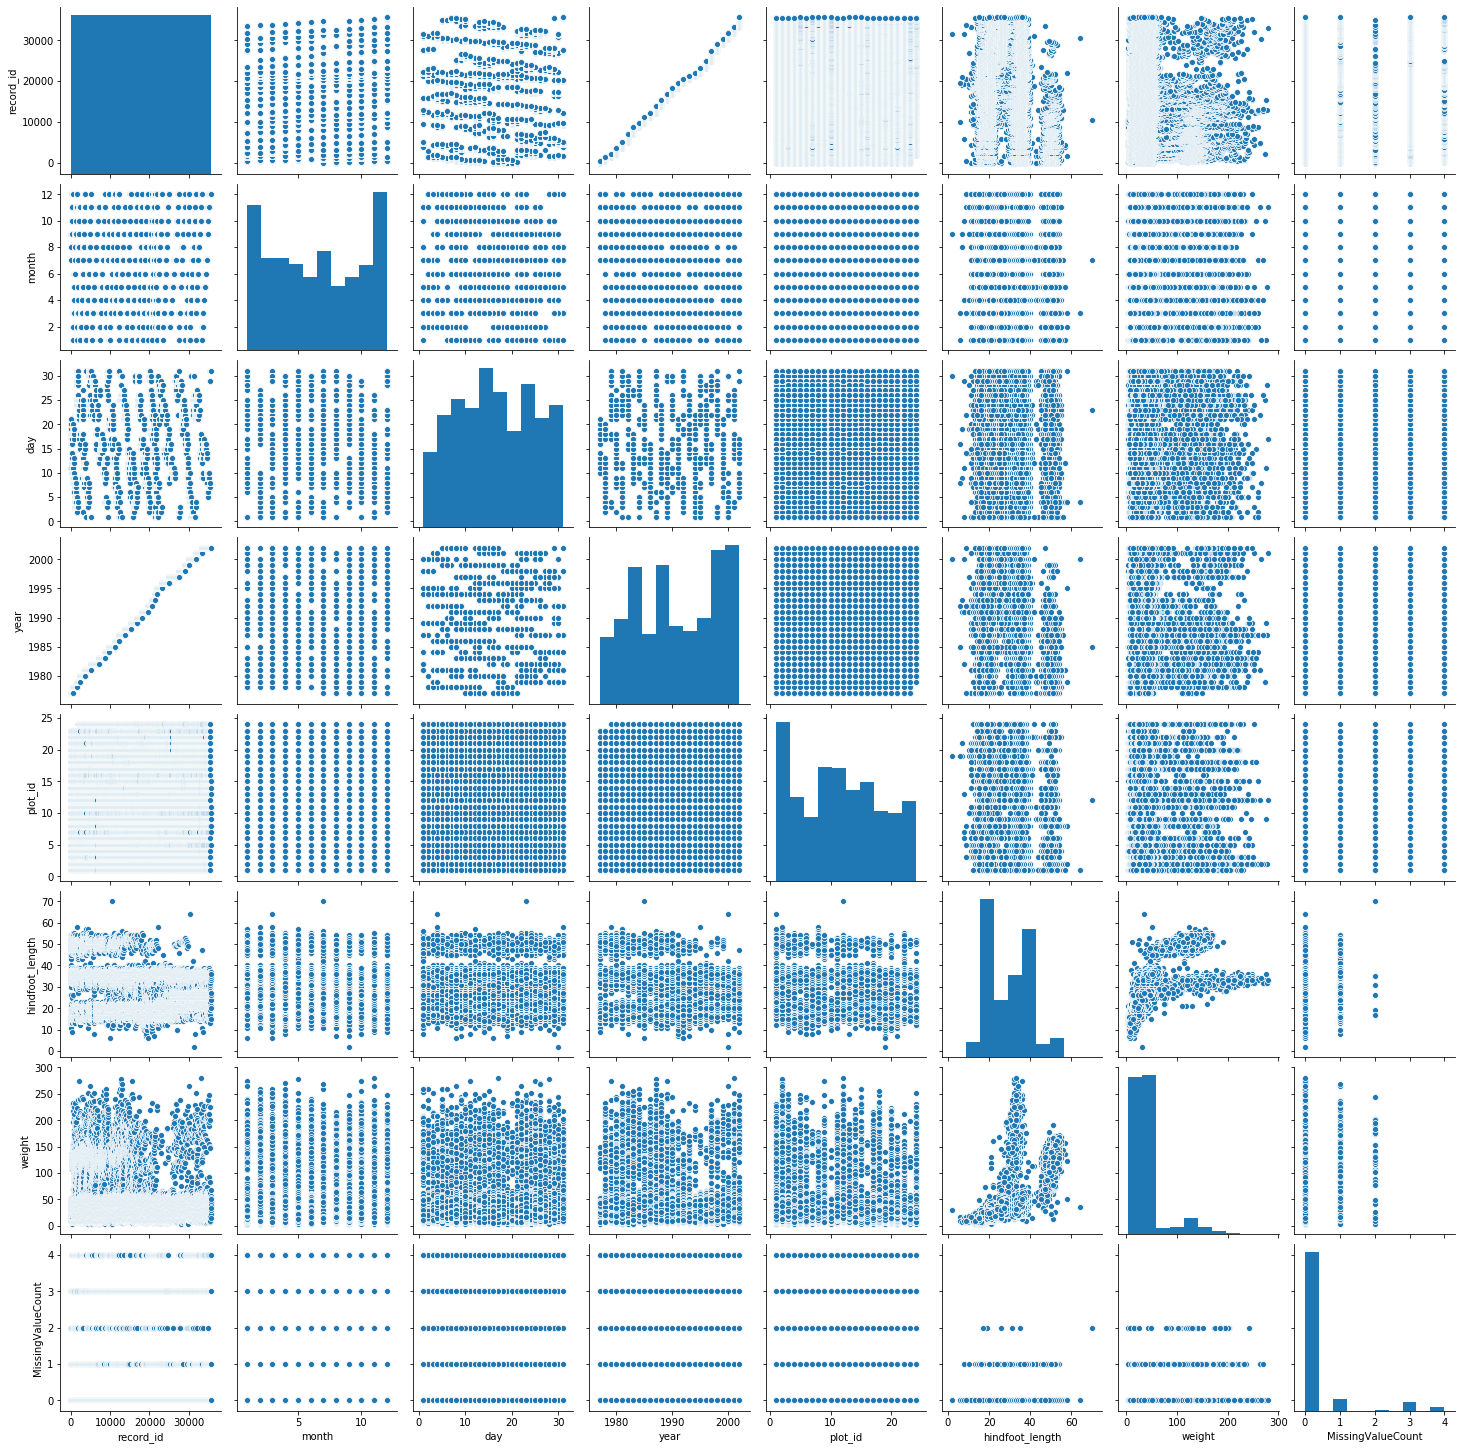

In [24]:
vizDDA(dfsm)

In [3]:
df2 = pd.read_csv('Portal_rodents_19772002_scinameUUIDs.csv', engine='python')
df2=pd.DataFrame(df2['scientificName'].str.strip())

In [4]:
df2

,scientificName
0,Amphispiza bilineata
1,Amphispiza bilineata
2,Ammodramus savannarum
3,Ammodramus savannarum
4,Ammospermophilis harrisi
...,...
35544,NaN
35545,NaN
35546,NaN
35547,NaN
